In [ ]:
#run to install xgboost
pip install xgboost

* Please restart the kernel (Kernel->Restart) before continuing

In [1]:
#initialise general libraries
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [2]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [3]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# XGBoost Model
## XGBoost classifier model (1)
## Kaggle Score: 0.88189, Validation Score: 0.879786114268873
<img src="xgboo1.png">

In [4]:
xgb_model1v = xgb.XGBClassifier(random_state=1, learning_rate=0.111111, gamma=0.0, colsample_bytree=0.6, subsample=0.8, reg_alpha=1e-05)
xgb_model1v.fit(train_Xv, train_yv)
xgbprediction1v = xgb_model1v.predict_proba(test_Xv)
print("Validation score:",roc_auc_score(test_yv, xgbprediction1v[:,1]))

Validation score: 0.879786114268873


In [5]:
xgb_model1 = xgb.XGBClassifier(random_state=1, learning_rate=0.111111, gamma=0.0, colsample_bytree=0.6, subsample=0.8, reg_alpha=1e-05)
xgb_model1.fit(train_X, train_y)
xgbprediction1 = xgb_model1.predict_proba(test_X)

In [6]:
xgbpred1 = {'id': df_test['id'].values,
        'target': xgbprediction1[:,1]}
df_xgbpred1 = DataFrame(xgbpred1)

df_xgbpred1 = df_xgbpred1.reset_index().set_index('id')
df_xgbpred1 = df_xgbpred1.drop(columns='index')
df_xgbpred1.head()

,target
id,
5,0.020283
10,0.193289
11,0.029360
13,0.281708
16,0.014862


In [7]:
df_xgbpred1.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/xgboo1.csv')

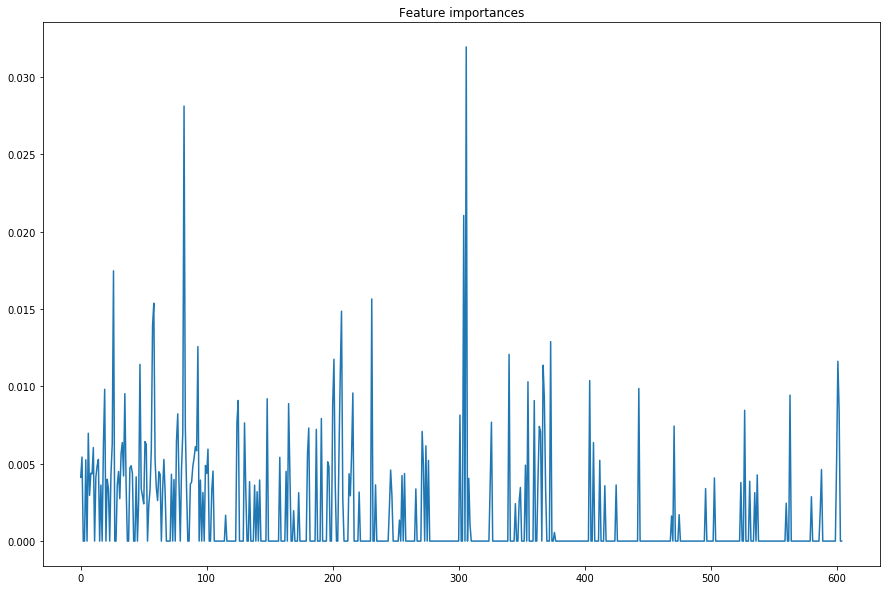

In [8]:
xgbfeatsUsed1 = xgb_model1.feature_importances_
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.plot(xgbfeatsUsed1)
plt.show()

* Removing features below 0.005 should improve the model

## XGBoost classifier model (2)
## Kaggle Score: 0.88262, Validation Score: 0.8815530574151264
<img src="xgboo2.png">

In [9]:
xgb_model2v = xgb.XGBClassifier(random_state=1,booster='dart', learning_rate=0.111111, gamma=0.0, colsample_bytree=0.6, subsample=0.8, reg_alpha=1e-05)
xgb_model2v.fit(train_Xv, train_yv)
xgbprediction2v = xgb_model2v.predict_proba(test_Xv)
print("Validation score:",roc_auc_score(test_yv, xgbprediction2v[:,1]))

Validation score: 0.8815530574151264


In [10]:
xgb_model2 = xgb.XGBClassifier(random_state=1, booster='dart', learning_rate=0.111111, gamma=0.0, colsample_bytree=0.6, subsample=0.8, reg_alpha=1e-05)
xgb_model2.fit(train_X, train_y)
xgbprediction2 = xgb_model2.predict_proba(test_X)

In [11]:
xgbpred2 = {'id': df_test['id'].values,
        'target': xgbprediction2[:,1]}
df_xgbpred2 = DataFrame(xgbpred2)

df_xgbpred2 = df_xgbpred2.reset_index().set_index('id')
df_xgbpred2 = df_xgbpred2.drop(columns='index')
df_xgbpred2.head()

,target
id,
5,0.029052
10,0.127290
11,0.029486
13,0.212668
16,0.022865


In [12]:
df_xgbpred2.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/xgboo2.csv')

* improved first model by changing booster method to dart